import library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def generate_synthetic_ecg(length = 1000, anomaly_position=600):
  t=np.linspace(0,1,length)
  normal_ecg=np.sin(2*np.pi*1.5*t)+0.1*np.random.randn(length)
  anomaly= np.sin(2*np.pi*6*t[:50])

  ecg_signal=normal_ecg.copy()
  ecg_signal[anomaly_position:anomaly_position+50]+=anomaly
  return normal_ecg, ecg_signal

In [ ]:
def detect_anomalies(ecg_signal, template, threshold):
  conv_result = convolve(ecg_signal, template, mode='same')
  normalized_result = (conv_result-np.min(conv_result))/(np.max(conv_result) - np.min(conv_result))
  anomaly_indices = np.where(normalized_result>threshold)[0]
  return anomaly_indices, normalized_result

In [ ]:
normal_ecg, ecg_with_anomaly=generate_synthetic_ecg()
anomaly_template=np.sin(2*np.pi*6*np.linspace(0,1,50))
anomaly_indices, conv_output=detect_anomalies(ecg_with_anomaly, anomaly_template, 0.7)

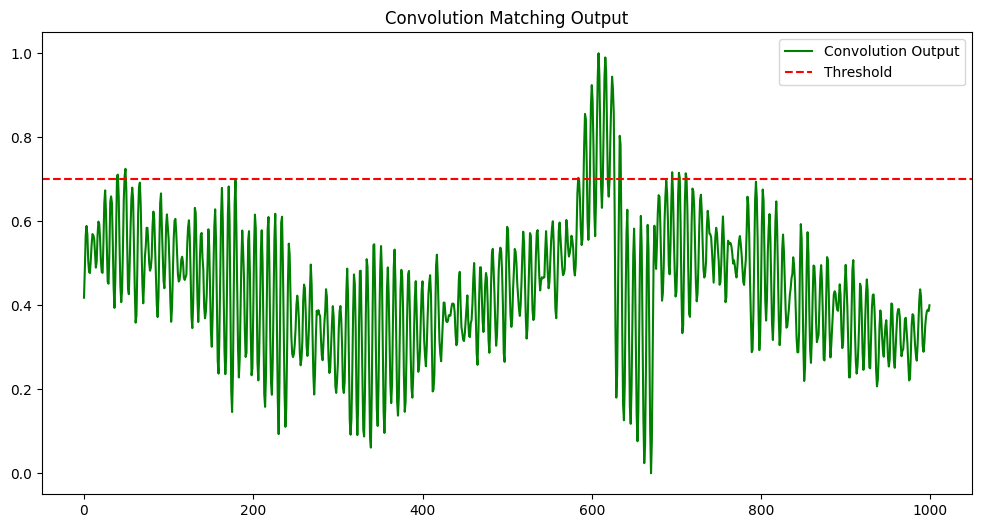

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(conv_output, label='Convolution Output', color='g')
plt.axhline(y=0.7, color='r', linestyle='--', label='Threshold')
plt.title('Convolution Matching Output')
plt.legend()
plt.show()

In [ ]:
y_true=np.zeros(len(ecg_with_anomaly))
y_true[600:650] = 1 #실제 부정맥 발생 구간
y_pred=np.zeros(len(ecg_with_anomaly))
y_pred[anomaly_indices]=1 #탐지된 부정맥 위치
conf_matrix=confusion_matrix(y_true, y_pred)
report=classification_report(y_true, y_pred, target_names=['Normal','Arrhythmia'])
print("\n Confusion Matrix:\n", conf_matrix)
print("\n Classification Report:\n", report)


 Confusion Matrix:
 [[934  16]
 [ 30  20]]

 Classification Report:
               precision    recall  f1-score   support

      Normal       0.97      0.98      0.98       950
  Arrhythmia       0.56      0.40      0.47        50

    accuracy                           0.95      1000
   macro avg       0.76      0.69      0.72      1000
weighted avg       0.95      0.95      0.95      1000



혼동행렬 정의 -과제